In [18]:
import pandas as pd

In [19]:
filepath = '../final_data/final_weekly.csv'

In [20]:
data = pd.read_csv(filepath)

# Get Summary Statistics

In [21]:
save_csv = False

In [22]:
summary_dct = {}
for col in data.columns:
    if data[col].dtype in [np.int64, np.float64]:
        summary_dct[col] = {
            "N_samples": data[col].count(),
            "Mean": data[col].mean(),
            "Median": data[col].median(),
            "Standard Deviation": data[col].std(),
            "Minimum": data[col].min(),
            "Maximum": data[col].max()
        }
summary_df = pd.DataFrame(summary_dct)
summary_df = summary_df.round(4)
if save_csv:
    summary_df.to_csv('../final_data/summary_statistics.csv')

# Generate Time Series Graphs:

In [23]:
save_figs = False

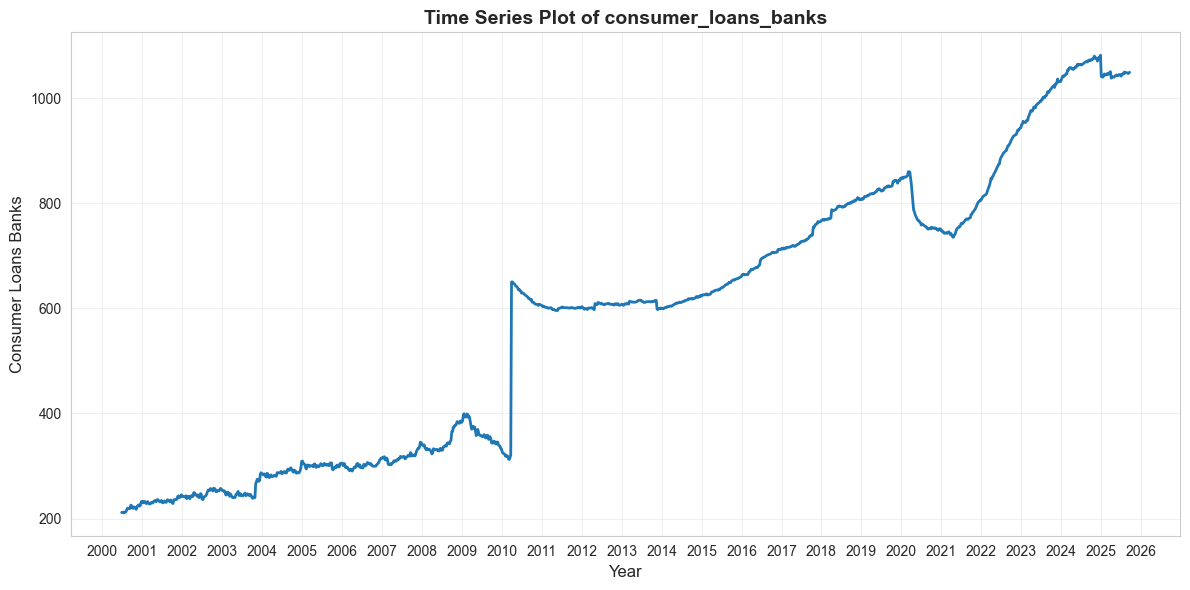

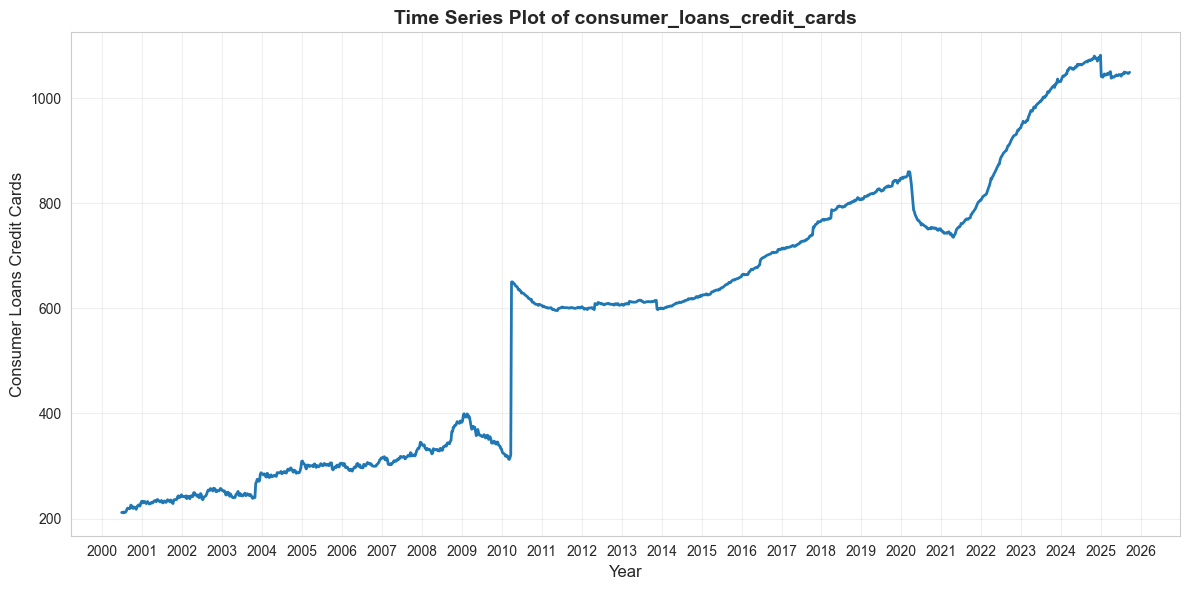

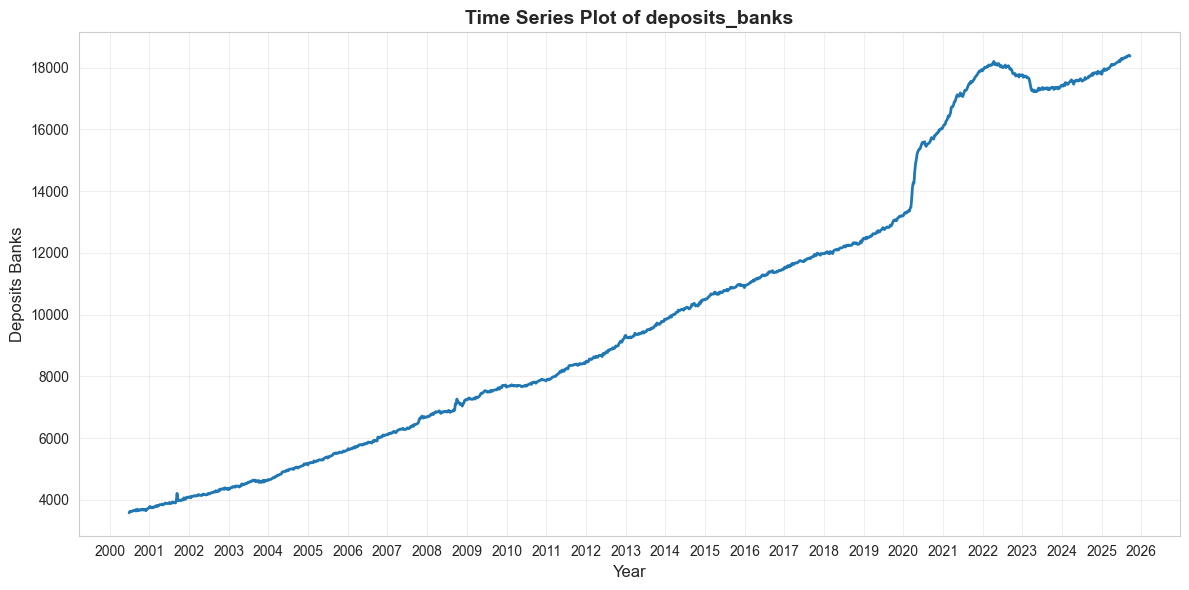

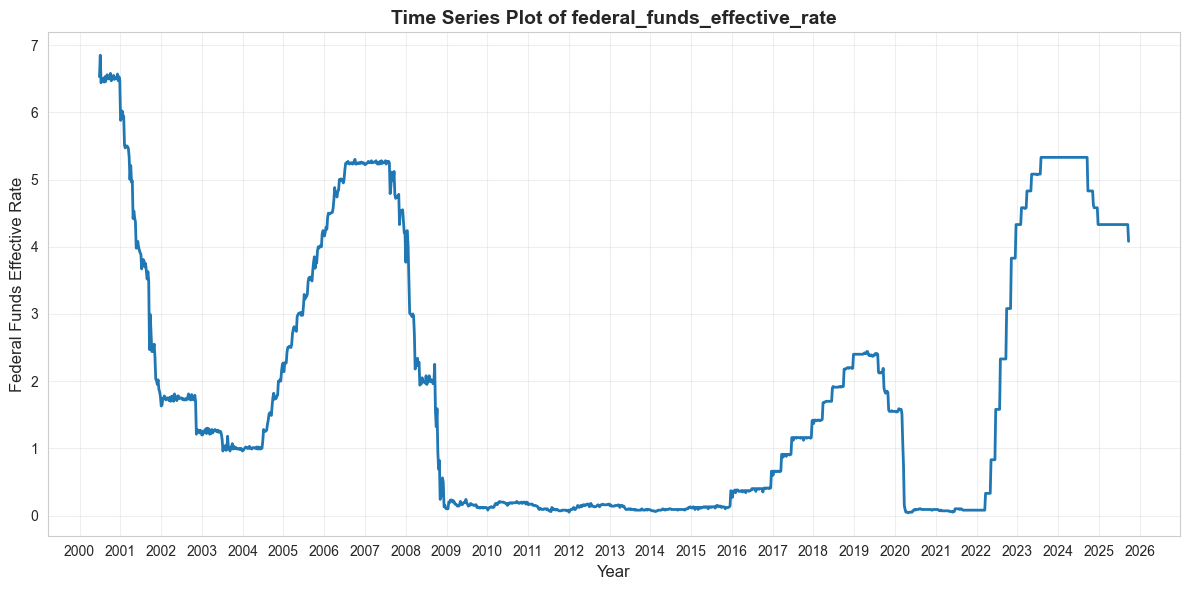

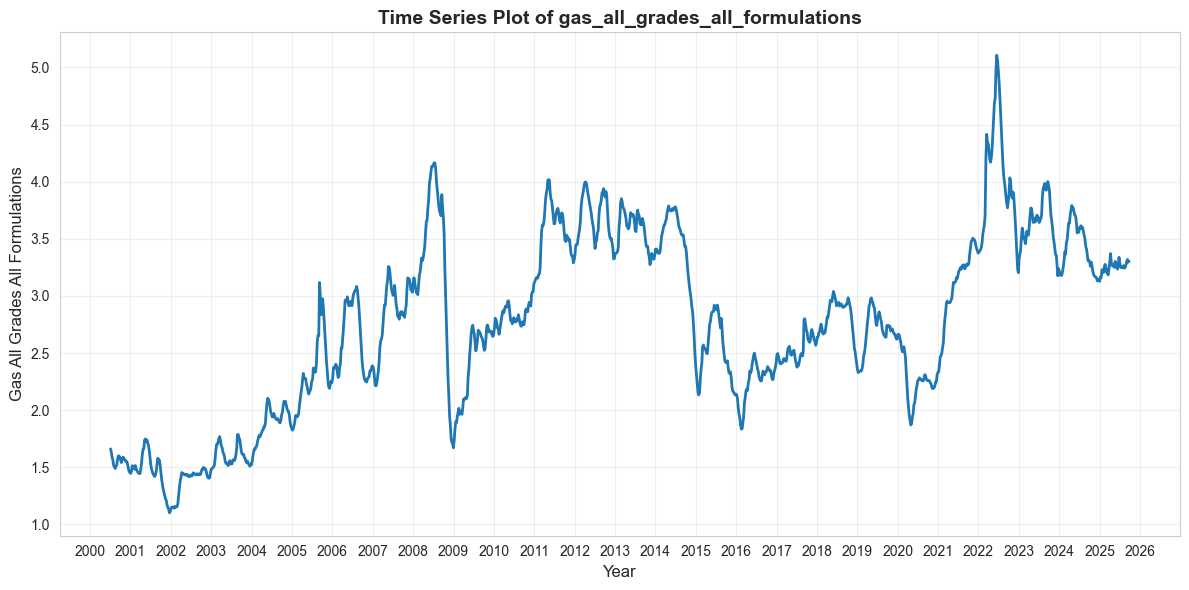

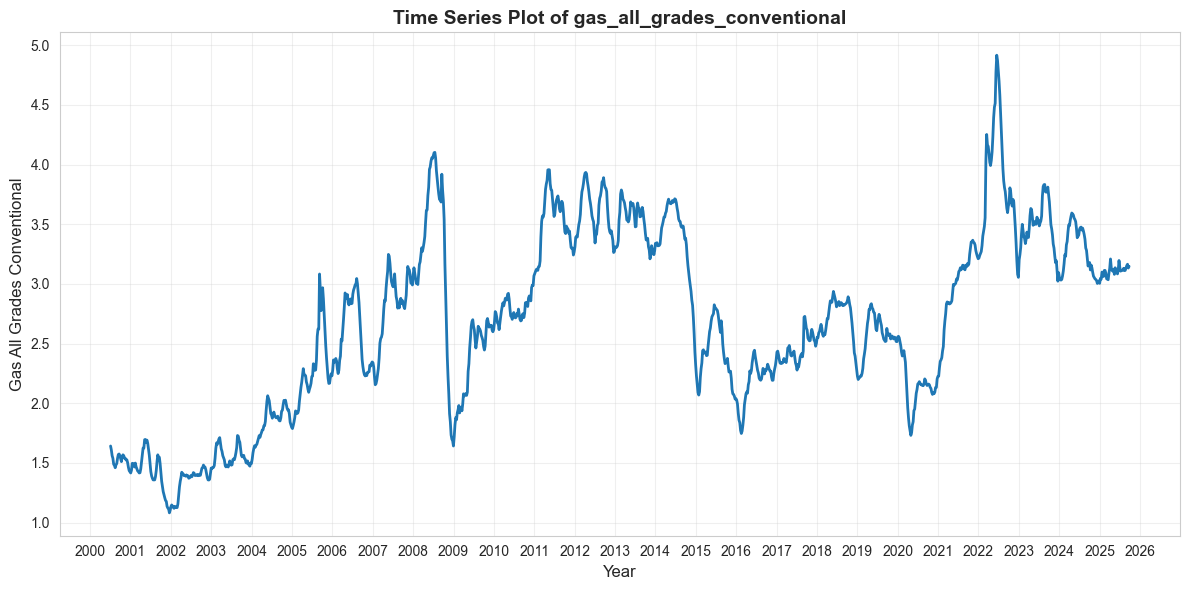

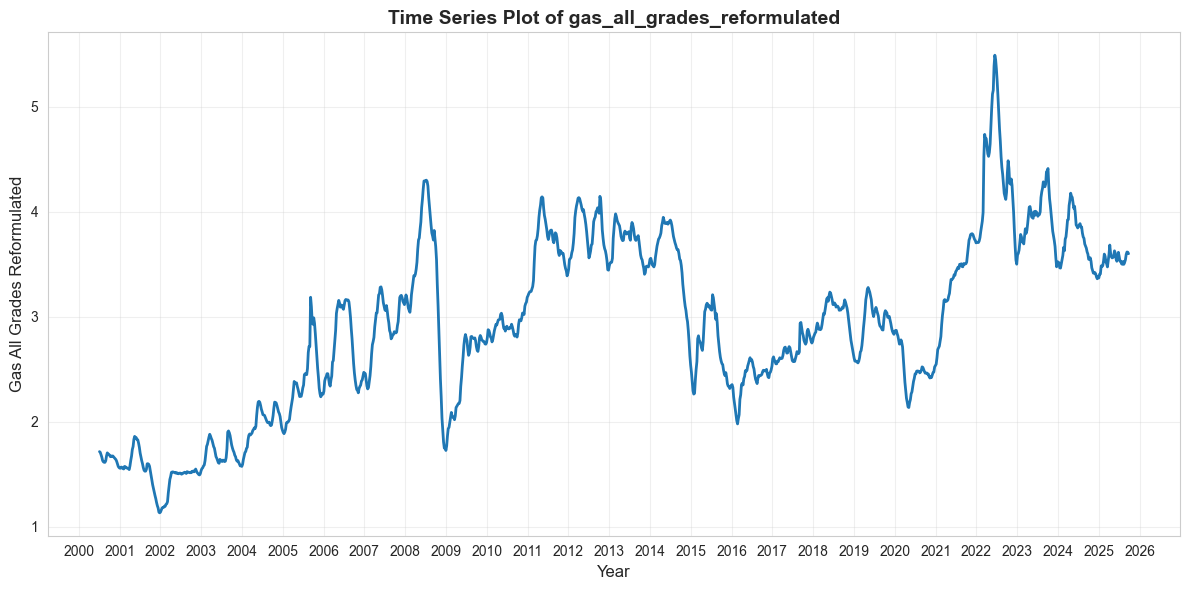

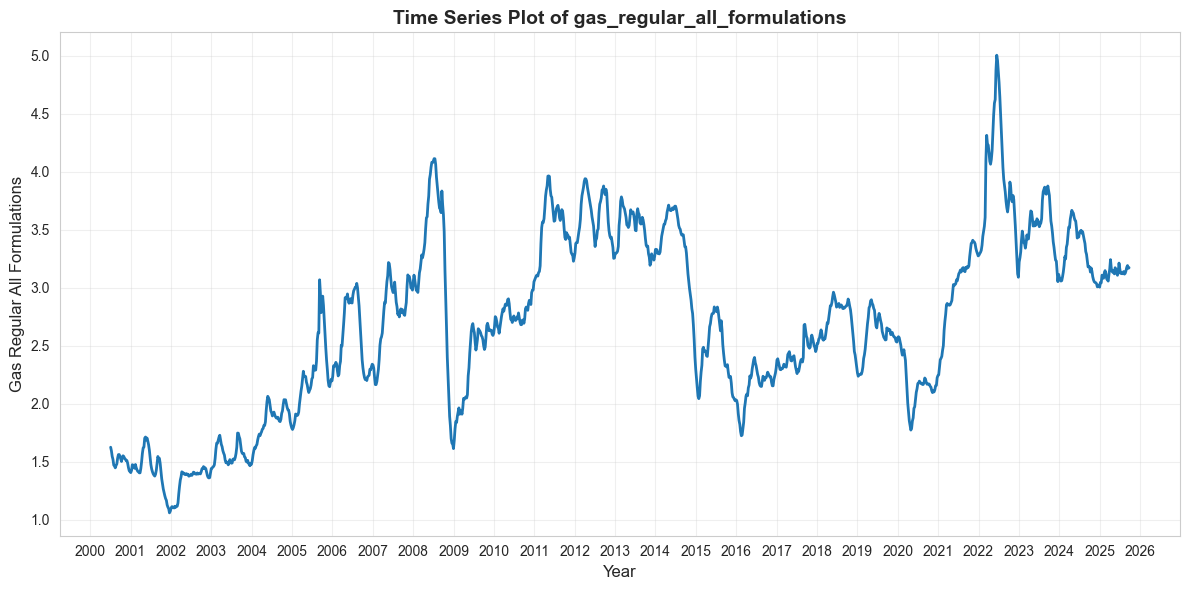

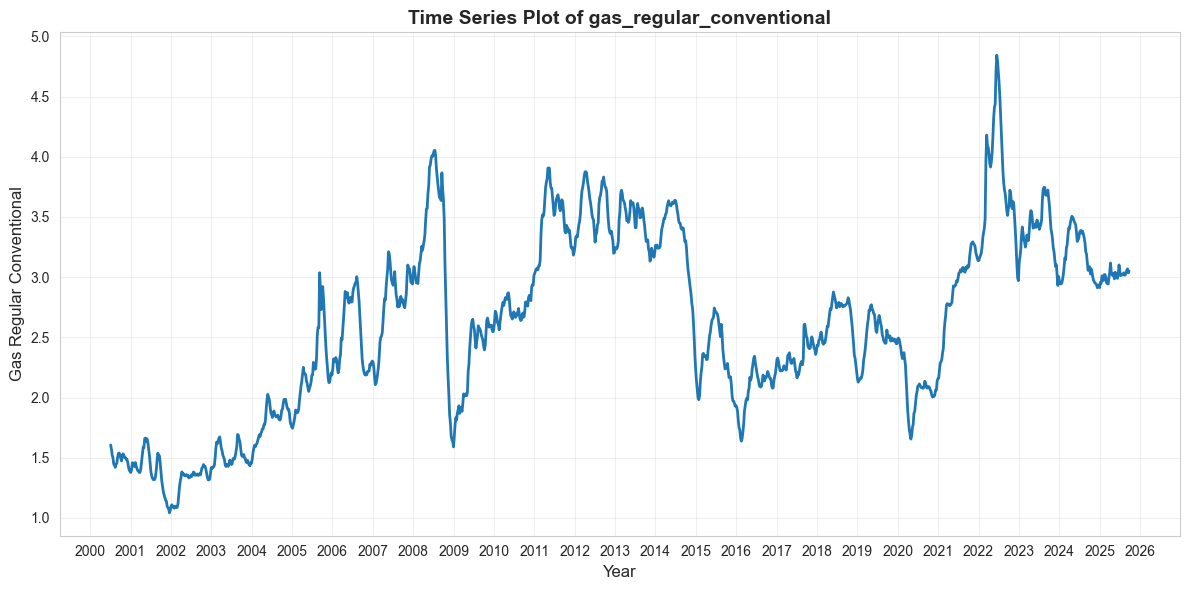

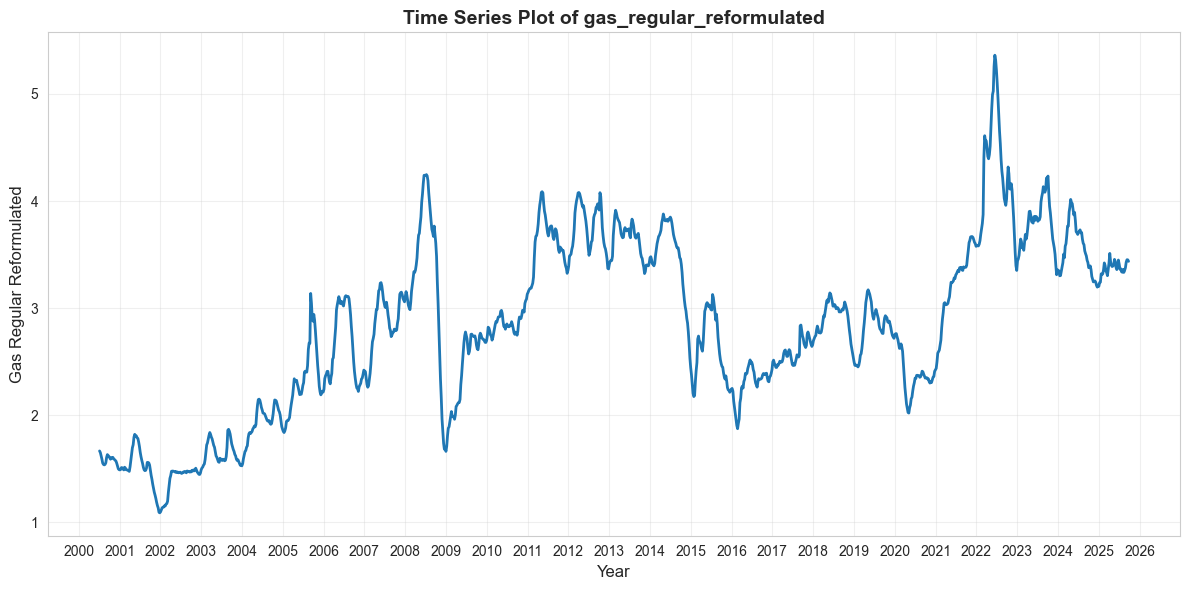

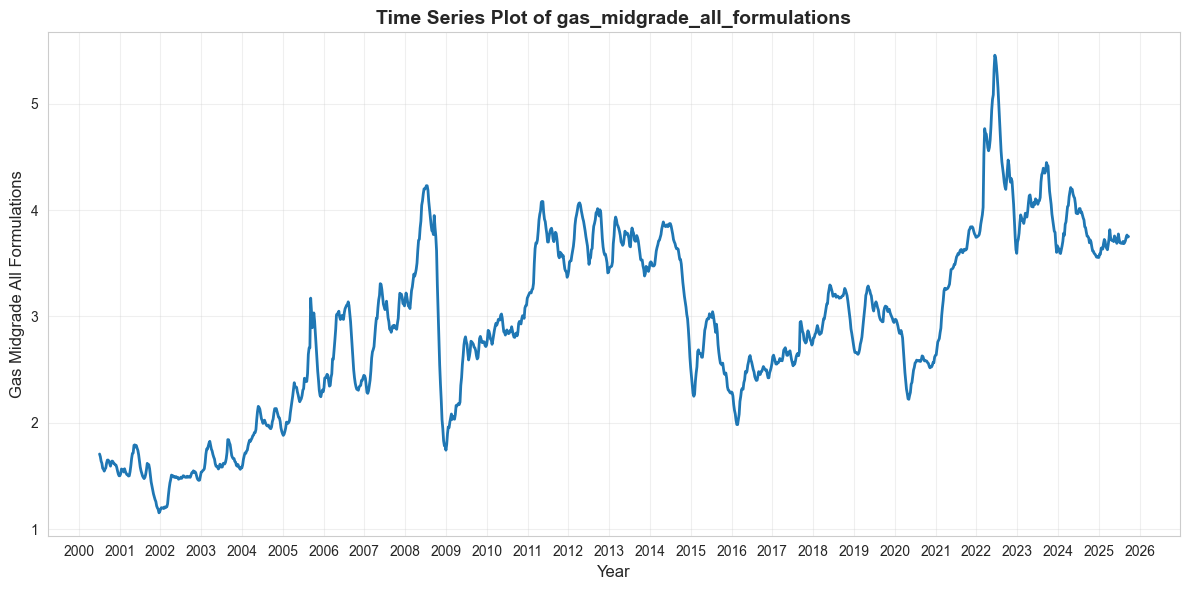

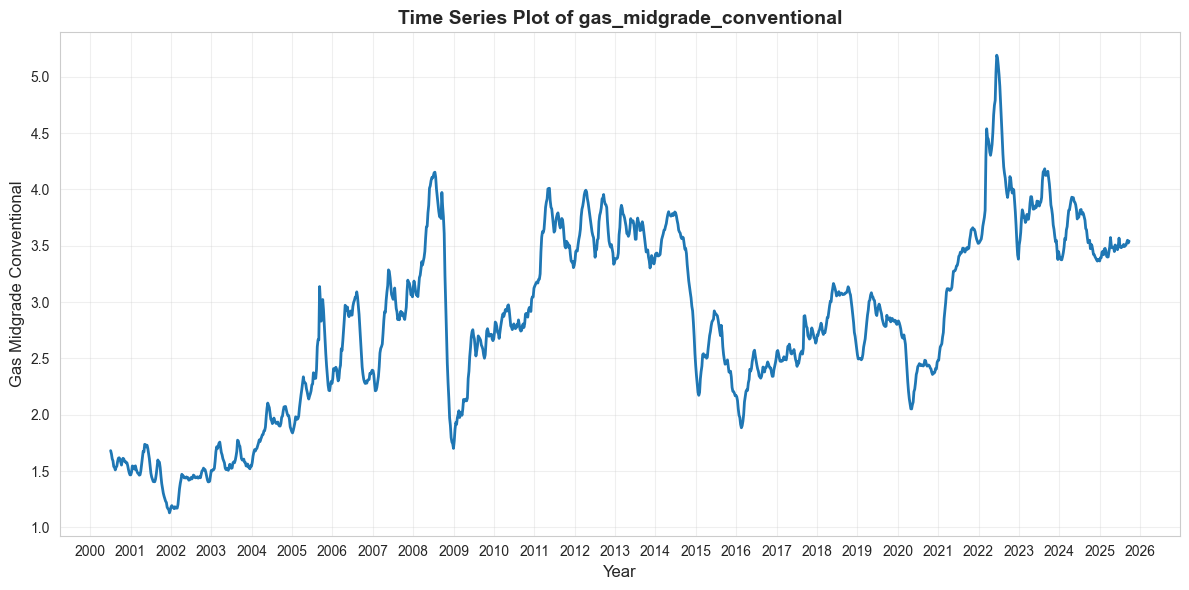

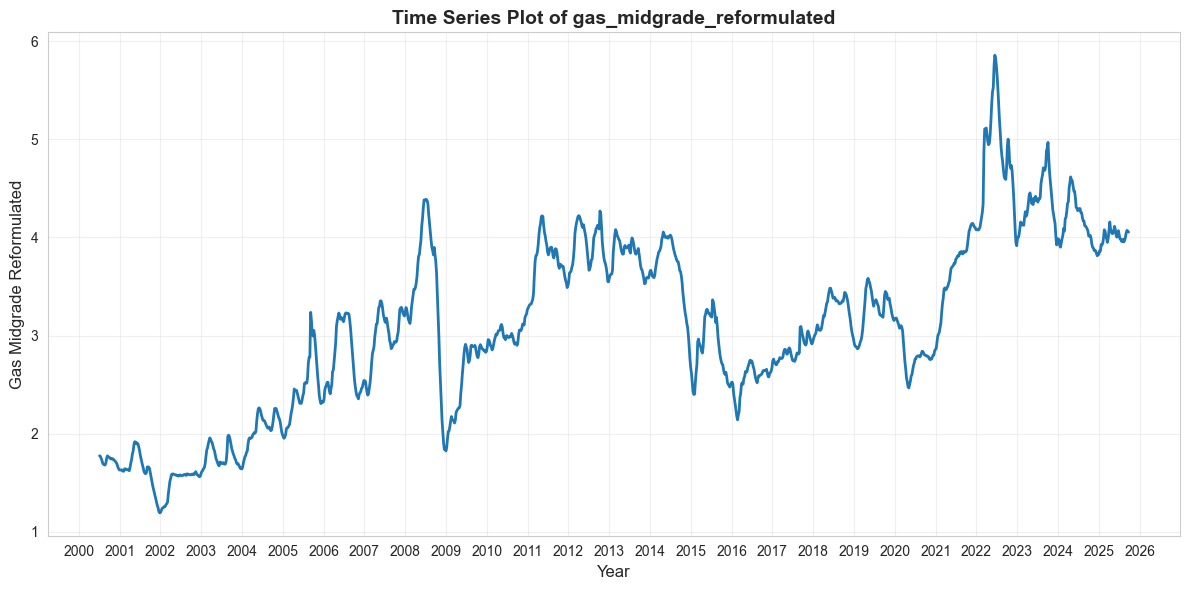

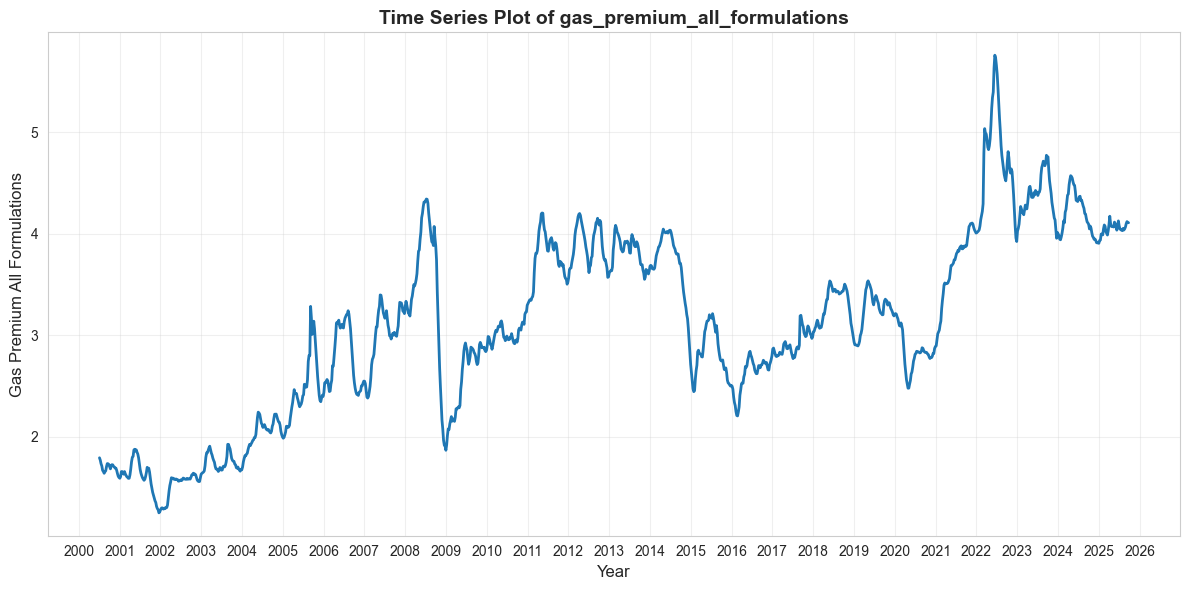

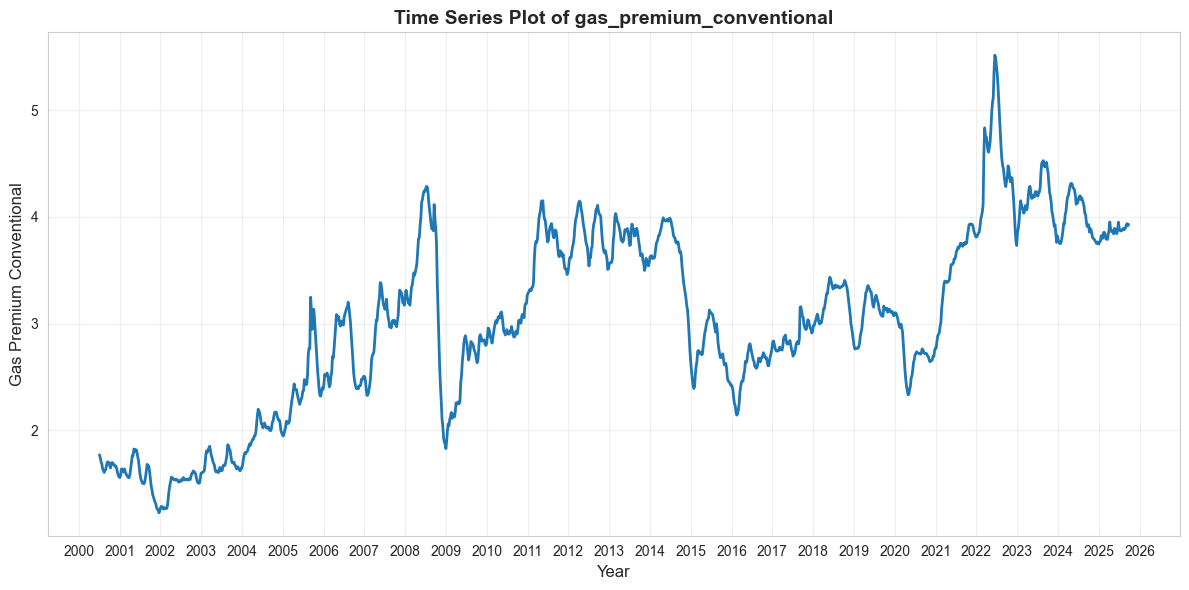

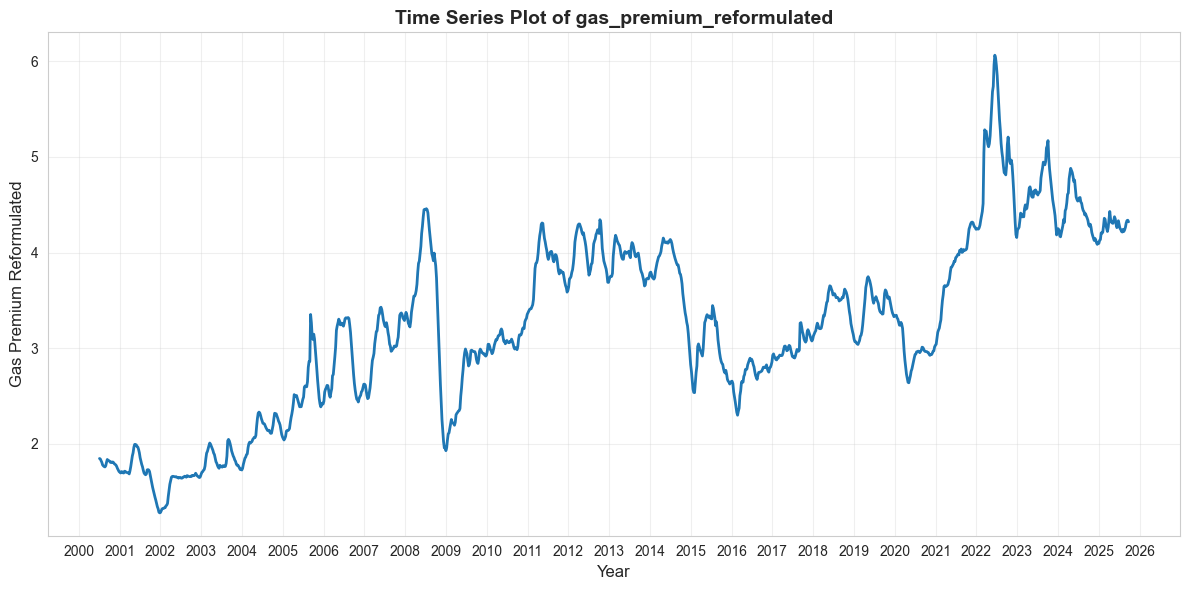

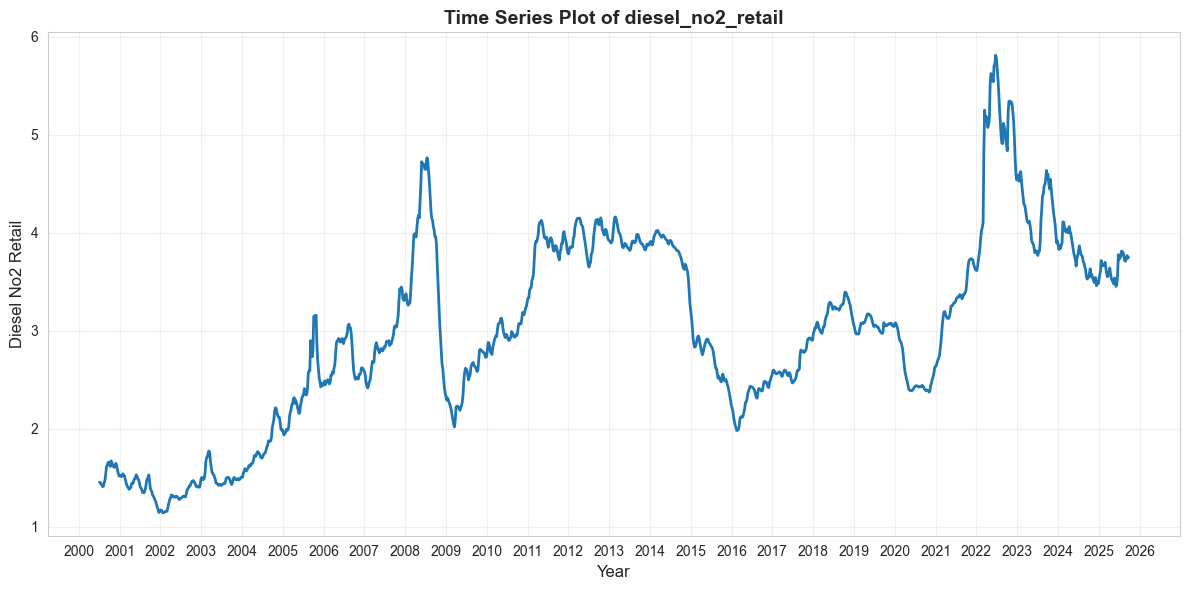

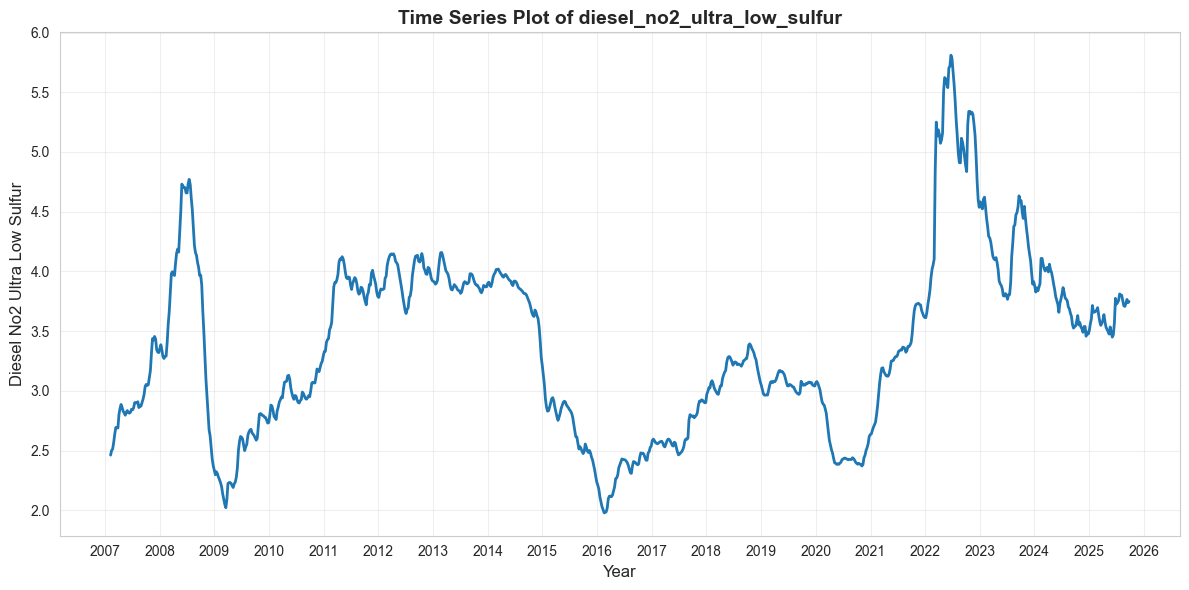

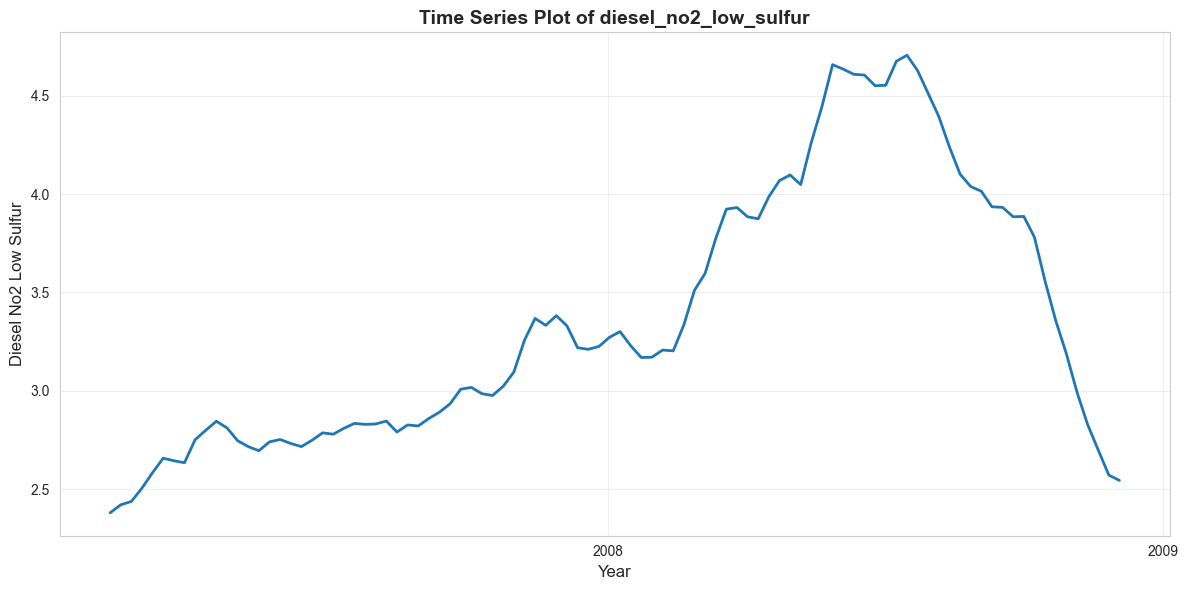

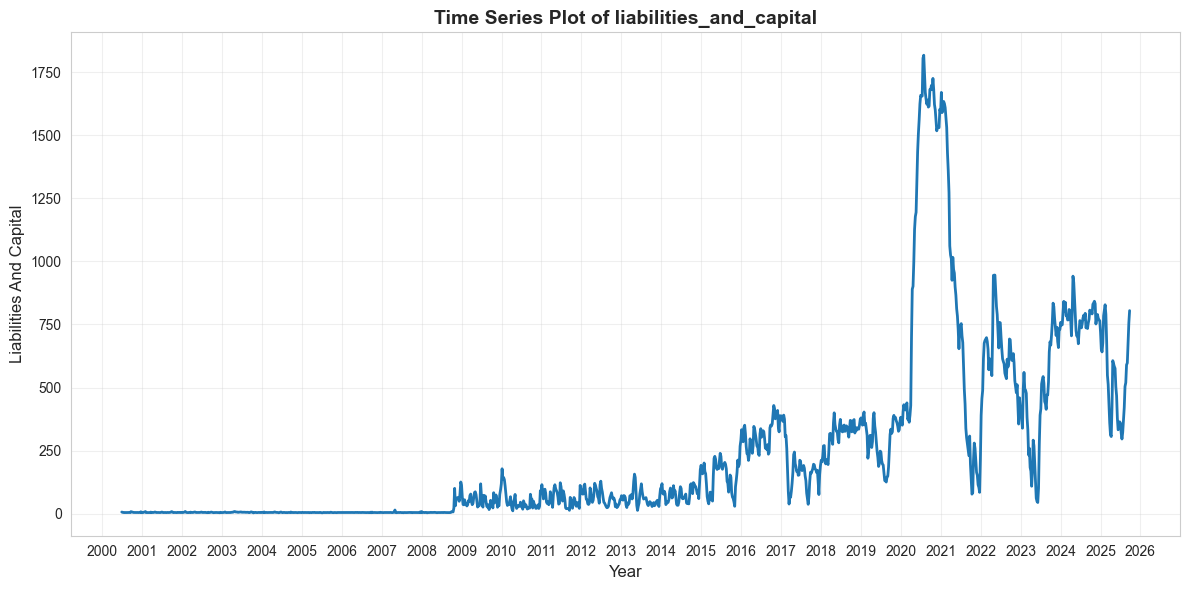

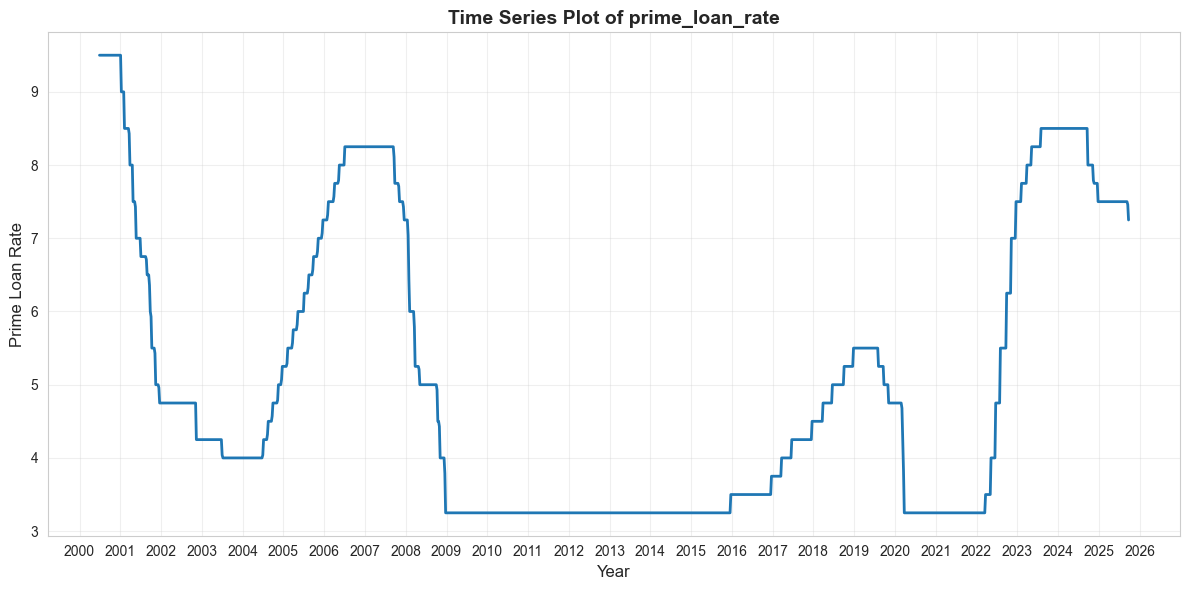

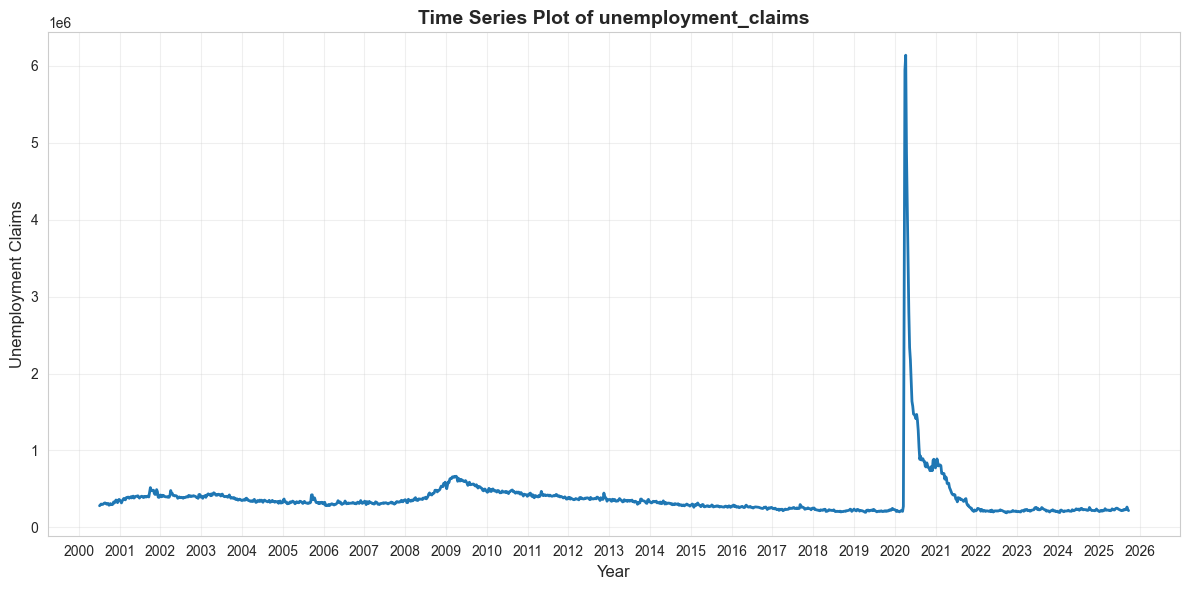

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set_style("whitegrid")
data['date'] = pd.to_datetime(data['date'])
for col in data.columns:
    if data[col].dtype in [np.int64, np.float64]:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        sns.lineplot(data=data, x=data.date, y=col, ax=ax, linewidth=2)
        
        ax.set_title(f'Time Series Plot of {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel(col.replace('_', ' ').title(), fontsize=12)
        
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        ax.grid(True, alpha=0.3)
        
        plt.xticks(rotation=0)  
        plt.tight_layout()
        if save_figs:
            plt.savefig(f'../time_series_graphs/{col}_timeseries.png', dpi=300)
            plt.close()
        else:
            plt.show()